In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
model=DecisionTreeClassifier(max_depth=5)

In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [5]:
#Embarked -> S replace
#Cabin -> Replace (N)
#Age -> replace w/ avg
embreplace = 'S'
cabreplace = 'N'
agereplace = round(df.Age.mean())

In [6]:
y= df['Survived']
X=df.drop(['Survived','Name','Ticket','Cabin'],axis=1)

In [7]:
X['Embarked'] = X['Embarked'].fillna(embreplace)
#X['Cabin'] = X['Cabin'].fillna(cabreplace)
X['Age'] = X['Age'].fillna(agereplace)
X['Sex'] = X['Sex'].replace({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].replace({'S': 0, 'C': 1,'Q': 2})

/tmp/ipykernel_18/2287704100.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Sex'] = X['Sex'].replace({'male': 0, 'female': 1})
/tmp/ipykernel_18/2287704100.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Embarked'] = X['Embarked'].replace({'S': 0, 'C': 1,'Q': 2})


In [8]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [10]:
trueval = y
predval = model.predict(X)
accuracy_score(trueval, predval)

0.8518518518518519

In [11]:
list(X.columns.values)

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

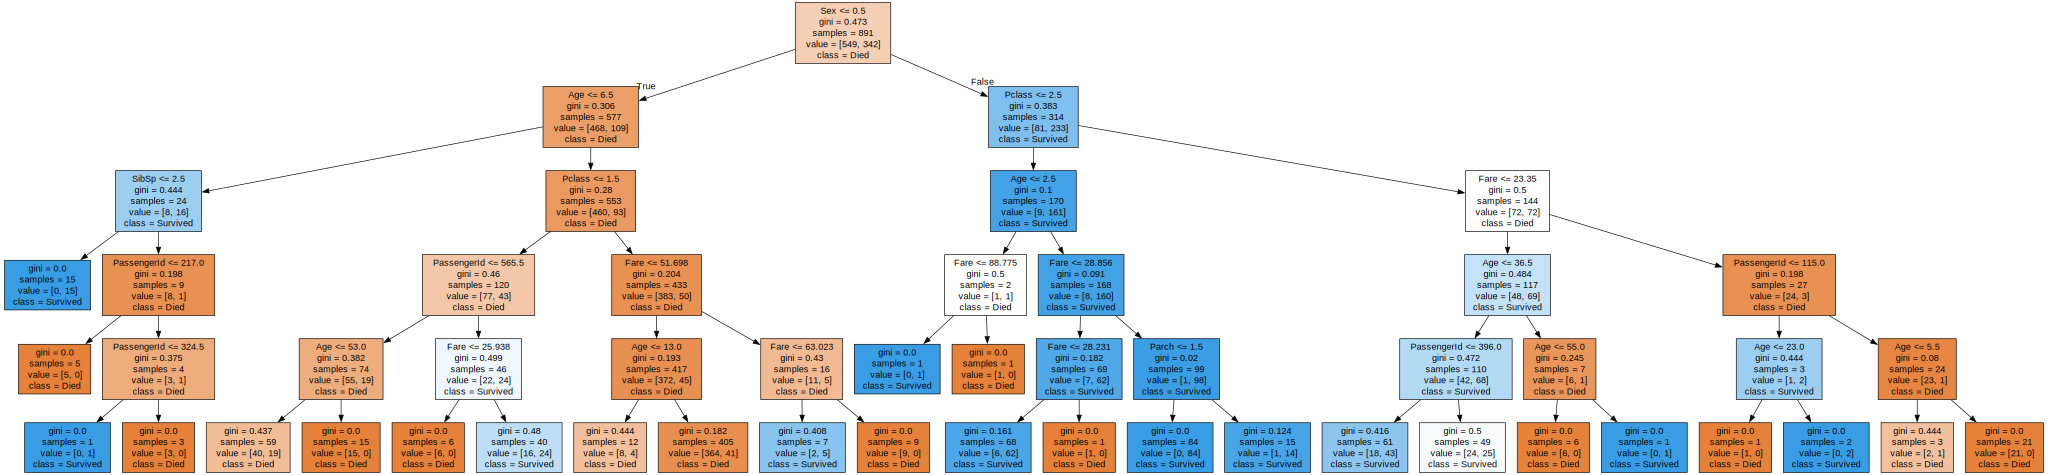

In [12]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model,
                                feature_names=list(X.columns.values),
                                class_names= list(['Died','Survived'])
                                ,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [13]:
dftest = pd.read_csv('/kaggle/input/titanic/test.csv')
x=dftest.drop(['Name','Ticket','Cabin'],axis=1)

In [14]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [15]:
x['Embarked'] = x['Embarked'].fillna(embreplace)
x['Age'] = x['Age'].fillna(round(dftest.Age.mean()))
x['Sex'] = x['Sex'].replace({'male': 0, 'female': 1})
x['Embarked'] = x['Embarked'].replace({'S': 0, 'C': 1,'Q': 2})
x['Fare'] = x['Fare'].fillna(x.Fare.median())

/tmp/ipykernel_18/3465737323.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Sex'] = x['Sex'].replace({'male': 0, 'female': 1})
/tmp/ipykernel_18/3465737323.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Embarked'] = x['Embarked'].replace({'S': 0, 'C': 1,'Q': 2})


In [16]:
prediction = model.predict(x)

In [17]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [18]:
dftest['Prediction'] = prediction

In [19]:
dfexport = dftest[['PassengerId','Prediction']]

In [20]:
dfexport.to_csv('predictionoutput.csv')